# 3. 머신 러닝 핵심 알고리즘

## 3.2 비지도학습

지도 학습처럼 레이블이 필요하지 않으며 정답이 없는 상태에서 훈련시키는 학습 방식

- 군집(Clustering)

    각 데이터의 유사성(거리)을 측정한 후 유사성이 높은(거리가 짧은) 데이터끼리 집단으로 분류

    *측정 방법: 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등..*

- 차원 축소(Dimensionality Reduction)

    차원을 나타내는 특성을 줄여서 데이터를 줄임

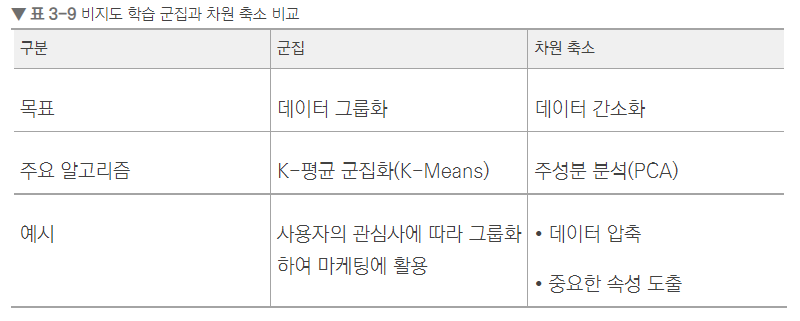


<hr>

### 3.2.1 K-평균 군집화(K-means clustering)

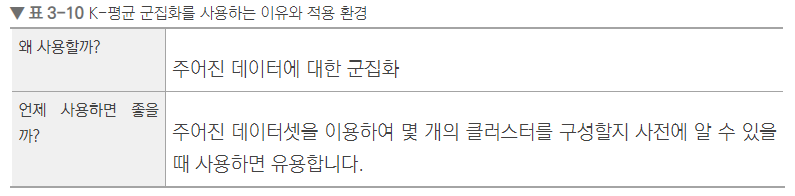

레이블이 없는 데이터를 입력받아 그룹화 하는 알고리즘입니다.

#### 학습과정

**1. 중심점(Centroid) 선택**

    랜덤하게 초기 중심점 K개를 선택한다.
   
   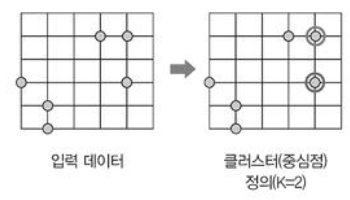
<br>
    


**2. 클러스터 할당**

    가장 가까운 중심점을 기준으로 데이터를 그룹화=군집화(clustering)한다.
    
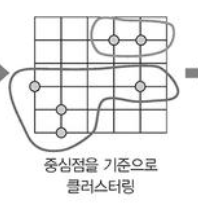
    
<br>
<br>

**3. 새로운 중심점 선택**

    클러스터마다 새로운 중심점을 계산한다.

<br>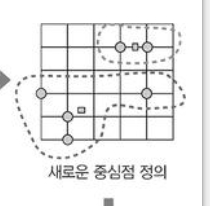

<br>
<br>


**4. 새로운 중심점 선택**
    
    새로운 중심점에 더 이상의 변화가 없다면 진행을 멈춘다.
    만약, 계속 변화가 있다면 2~3 과정을 반복한다.
    
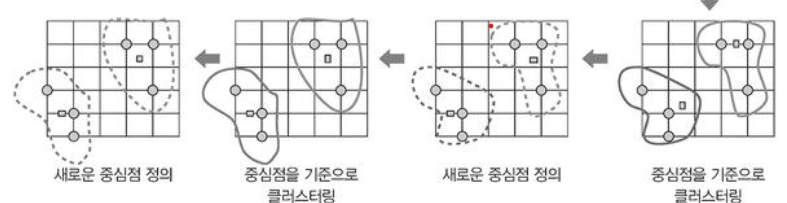

<br>
<br>

#### - 알고리즘 사용 추천 x

다음 상황에서는 데이터 분류가 원하는 결과와 다르게 발생할 수 있으므로 사용 x

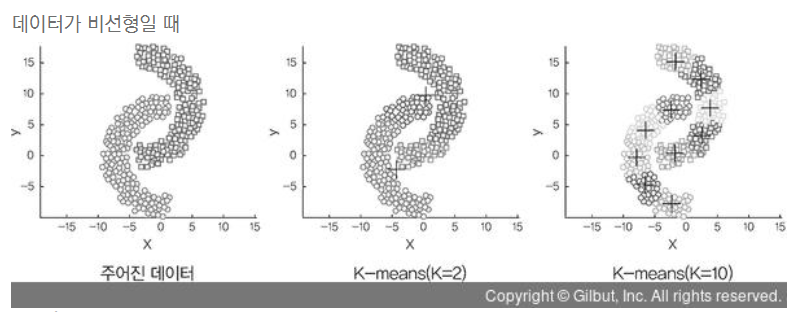


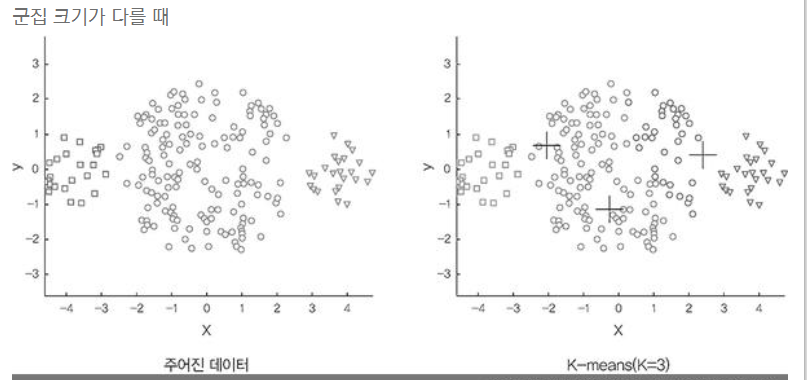

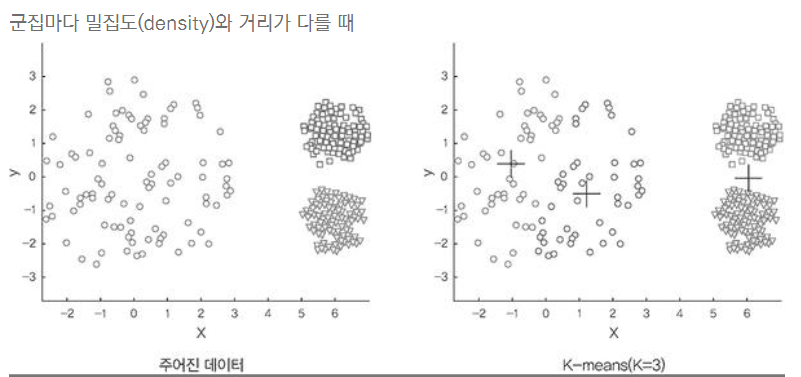

<hr>

##### K-평균 군집화 예제

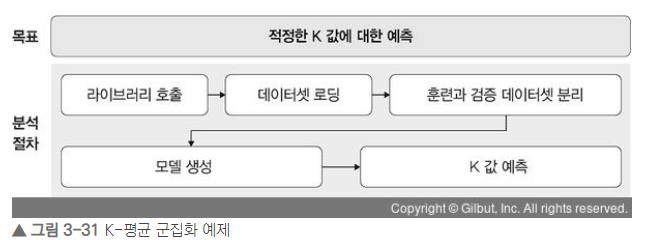

##### (1) 필요 라이브러리 호출 및 데이터 파일 불러오기

In [1]:
import pandas as pd #벡터 및 행렬의 연산 처리를 위한 라이브러리
from sklearn.preprocessing import MinMaxScaler #데이터 범위에 따른 중요도 변동(데이터 무시) 방지하기 위한 라이브러리
from sklearn.cluster import KMeans #K-평균 군집화 라이브러리
import matplotlib.pyplot as plt #데이터를 차트나 플롯으로 그려 주는 라이브러리

In [2]:
# 상품에 대한 연 지출 데이터(sales data.csv) 파일 불러오기
data = pd.read_csv('C:/Users/user/Desktop/Pytorch/080289-main/080289-main/chap03\data/sales data.csv')
data.head() #데이터의 상위 5개의 행 출력

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### (2) 데이터 분류하기

명목형 데이터 : 범주 간에 순서 의미가 없는 데이터

연속형 데이터 : 값이 연속적인 데이터

In [3]:
categorical_features = ['Channel', 'Region'] #명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] #연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) #명목형 데이터를 관계성이 없는 가변수(0,1)로 만들어줌
    data = pd.concat([data, dummies], axis=1) #기존 전체 data와 dummies 2개의 dataframe 결합
    data.drop(col, axis=1, inplace=True) #명목형 데이터 Channel, Region 삭제
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


##### (3) 데이터 전처리, K값 예측

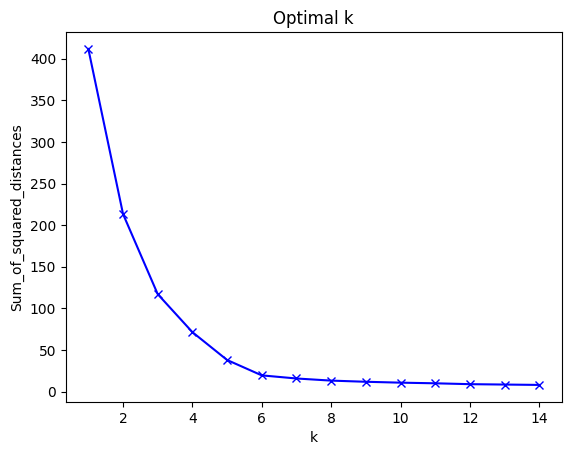

In [4]:
#데이터 스케일링
#연속형 데이터의 모든 특성에 동일하게 중요성을 부여하기 위해 sklearn의 MinMaxScaler() 사용

mms = MinMaxScaler() #모든 데이터가 0~1 사이 값
mms.fit(data) #모델 훈련 #주어진 데이터셋에 대하여 최대,최소,평균,분산 등의 scaling에 필요한 정보를 파악
data_transformed = mms.transform(data) #위에서 파악한 정보를 통해 데이터셋의 값을 변환



Sum_of_squared_distances = []
K = range(1,15) #1~14

# 각 K별로 모델을 생성하여 inertia를 측정합니다
#1~14까지의 각 k 값에 대해 k-평균을 초기화하고
#관성 속성을 사용하여 가장 가까운 클러스터 중심까지의 거리 제곱의 합을 식별
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed) #KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)
# K에 따른 km.inertia의 변화를 시각화합니다

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k') #x축, cluster 개수
plt.ylabel('Sum_of_squared_distances') #y축, 거리 제곱의 합
plt.title('Optimal k')
plt.show()

#k가 6부터 0에 가까워지고 있으므로 K=5일 때 최적이라고 판단

<hr>

### 3.2.2 밀도 기반 군집 분석(DBSCAN)

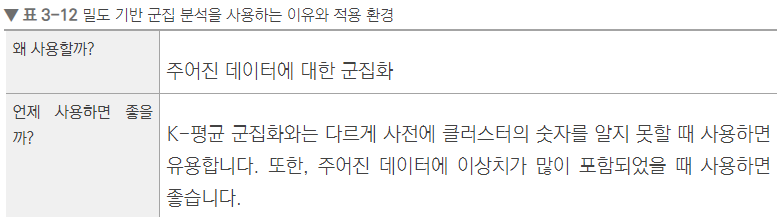

일정 밀도 이상을 가진 데이터를 기준으로 군집 형성

노이즈에 영향을 받지 않으며,<br>
K-평균 군집화에 비해 느리지만 K-평균 군집화가 잘 처리하지 못하는 오목하거나 볼록한 부분을 처리하는 데 유용

<br>

*노이즈 : 어떤 군집에도 포함되지 않은 데이터*

<br>

**학습과정**

**1. 엡실론(Epsilon) 내 점 개수 확인 및 중심점 결정**

    중심점 p1을 기준으로 거리 epsilon 내에 m개의 점이 있으면 하나의 군집으로 인식 
    <br>

    *엡실론 : 두 점 사의의 거리*
   
   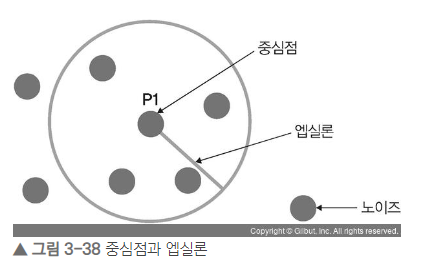
<br>
<br>

**2. 군집 확장**

    데이터의 밀도가 높은 지역에서 중심점을 만족하는 데이터가 있다면 새로운 군집 생성
    
    밀도 기반 군집 분석은 '밀도 기반' 이기 때문에 주위의 점들을 대상으로 중심점을 설정하고 새로운 군집을 생성하는 것이 가능하다.
    
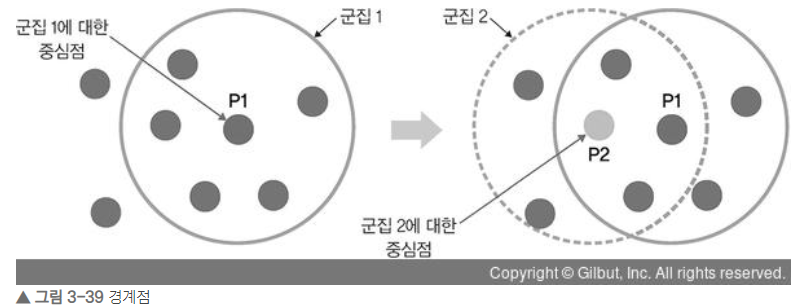

   생성된 군집 간의 군집 확대
    
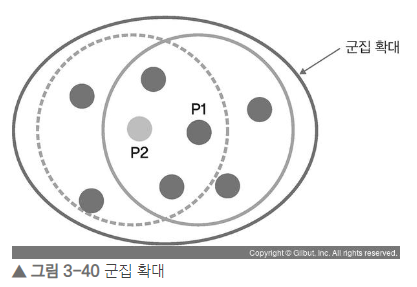

<br>

**3. 1 ~ 2단계 반복**

    데이터가 밀집된 밀도가 높은 지역에서 더 이상 중심점을 정의할 수 없을 때까지 반복
    
    
<br>

**4. 노이즈 정의**

    어떤 군집에도 포함되지 않은 데이터는 노이즈로 정의

<hr>

### 3.2.3 주성분 분석(PCA)

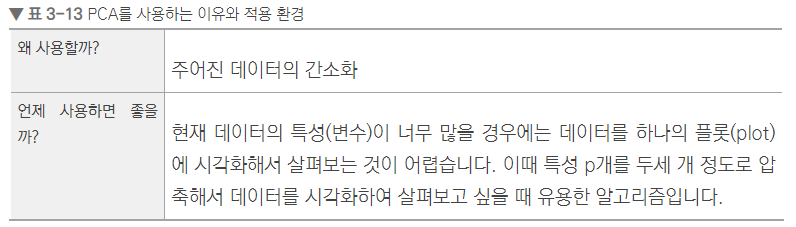



변수가 많은 고차원 데이터의 경우 중요하지 않은 변수로 처리해야 할 데이터양이 많아짐

=> 고차원 데이터를 저차원으로 축소시켜 데이터가 가진 대표 특성만을 추출

#### 학습과정

**1. 벡터의 방향과 크기를 통해 데이터들의 분포 특성을 잘 설명하는 벡터 두 개 선택**

    
   
<br>
    
**2. 벡터 두 개를 위한 적정한 가중치를 찾을 때까지 학습 진행**

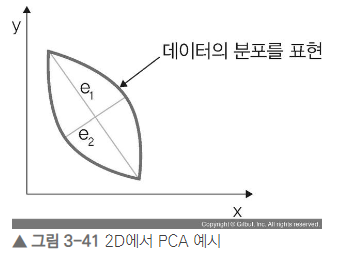
    
<br>
<br>

    
* 즉, PCA는 개별 데이터에 대한 성분을 분석하는 것이 아닌,<br>여러 데이터가 모여 하나의 분포를 이룰 때 해당 분포의 대표 특성을 분석하는 방법이다.

**따라서, 밀도 기반 군집 분석(Clustring)과 PCA 예제를 같이 묶어서 진행토록 하겠습니다**
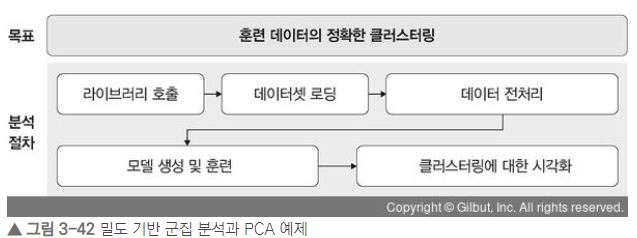

##### (1) 라이브러리 호출

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN #밀도 기반 군집 분석 #군집 알고리즘
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA #데이터 차원 축소

##### (2) github에서 다운받은 예제 파일에서 credit card.csv 파일을 불러오기

In [6]:
X = pd.read_csv('C:/Users/user/Desktop/Pytorch/080289-main/080289-main/chap03\data/credit card.csv') 
X = X.drop('CUST_ID', axis = 1) #해당 데이터에서 'CUST_ID' 열 삭제
X.fillna(method ='ffill', inplace = True) #ffill : '결측값을 바로 위 값과 동일하게 변경', inplace=True : 원본 변경
print(X.head()) #데이터셋 형태 확인

#*결측값은 알려지지 않고, 수집되지 않거나 잘못 입력된 데이터 세트의 값*

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

##### (3) 데이터 전처리 및 데이터를 2차원으로 차원 축소

In [7]:
scaler = StandardScaler() #Scikit-learn의 StandardScaler 함수를 사용하여 표준화
X_scaled = scaler.fit_transform(X) #평균:0, 표준편차:1이 되도록 데이터 크기 조정
X_normalized = normalize(X_scaled) #데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) #정규화한 데이터를 dataframe으로 변환
pca = PCA(n_components = 2) #2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) #차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679977
1 -0.519099  0.544826
2  0.330633  0.268879
3 -0.481656 -0.097612
4 -0.563512 -0.482506


##### (4) DBSCAN 모델 생성 및 결과의 시각화

In [8]:
# 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어있으면 핵심 샘플로 분류

db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) #모델 생성 및 훈련
labels = db_default.labels_ #각 데이터 포인트에 할당된 모든 클러스터 레이블의 numpy array를 labels에 저장

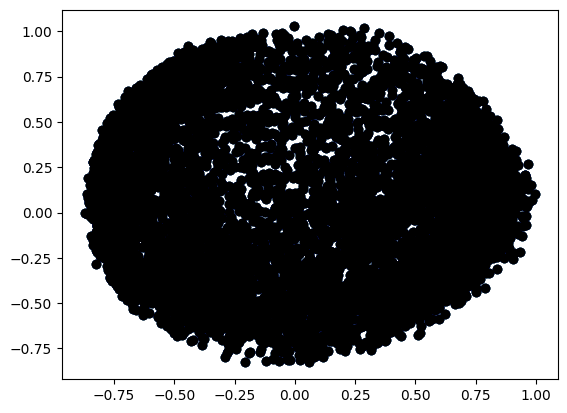

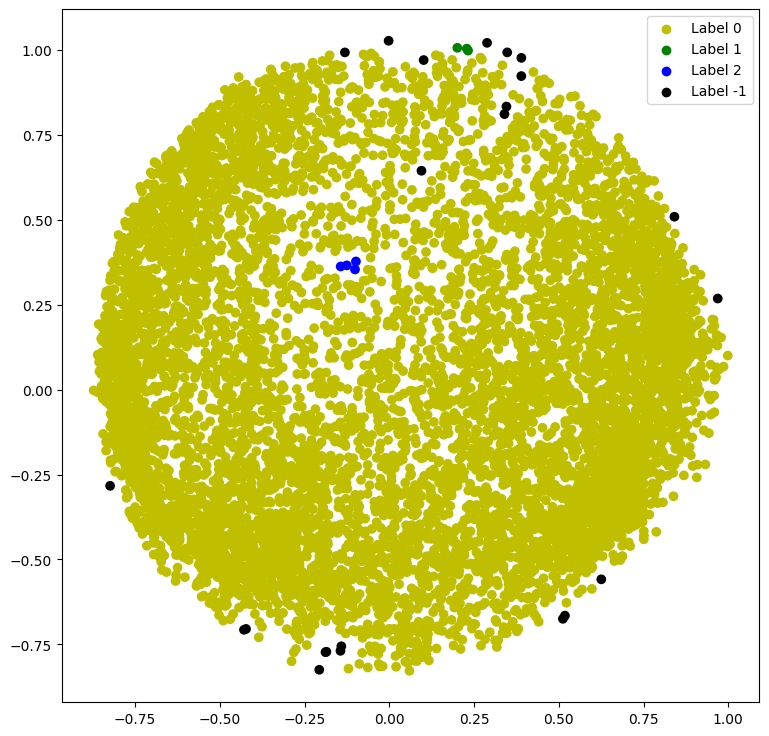

In [9]:
colours = {} #출력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels] #각 데이터 포인트에 대한 색상 벡터 생성
  
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); #플롯(plot)의 범례(legend) 구성
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) #정의된 색상 벡터에 따라 P1, P2, Plotting
  
plt.legend((y, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) #범례(Plotting 된 된 데이터가 무엇을 의미하는지에 대해 나타내는 방법) 구축 
plt.show()

#군집이 정확히 파악되지 않음 => 튜닝 필요

<br>
<br>
<br>


#### 적절한 HyperParameter(여기서는 eps와 min_samples)로 튜닝했을 경우

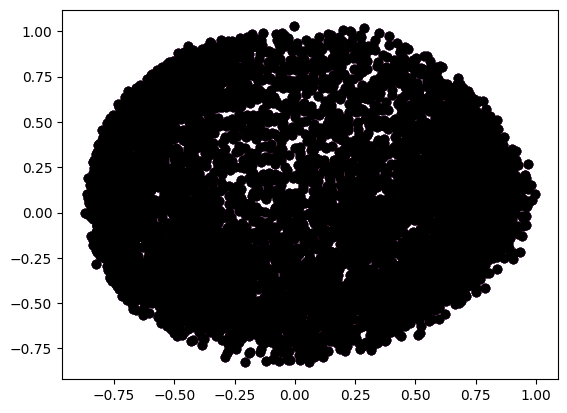

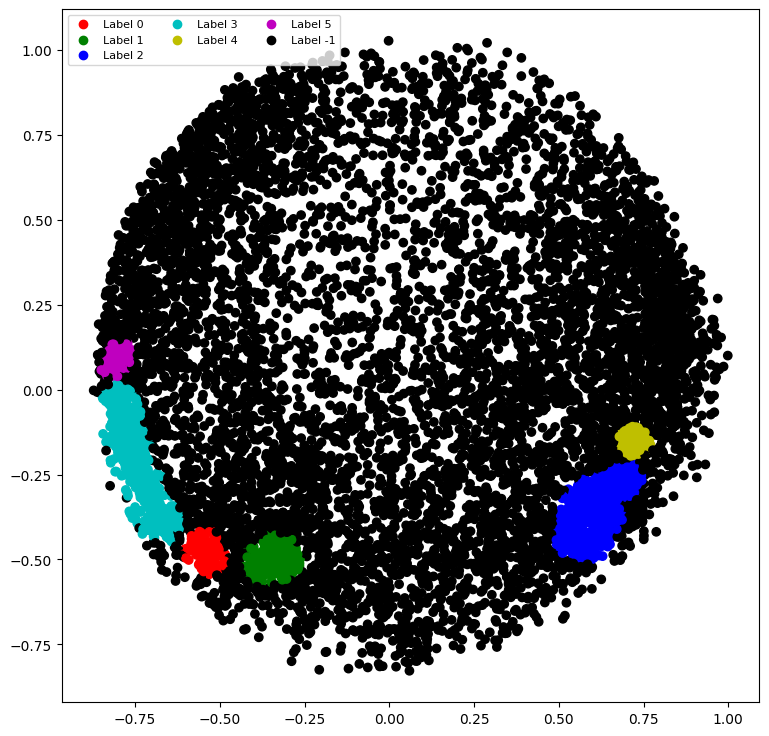

In [10]:
#HyperParameter : 머신러닝에서 모델링할 때 사용자가 직접 설정하는 값

db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


<br>
<br>
<br>


**잘못된 HyperParameter를 적용했을 때**

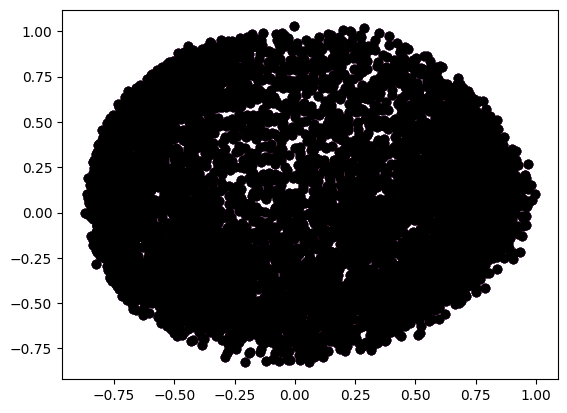

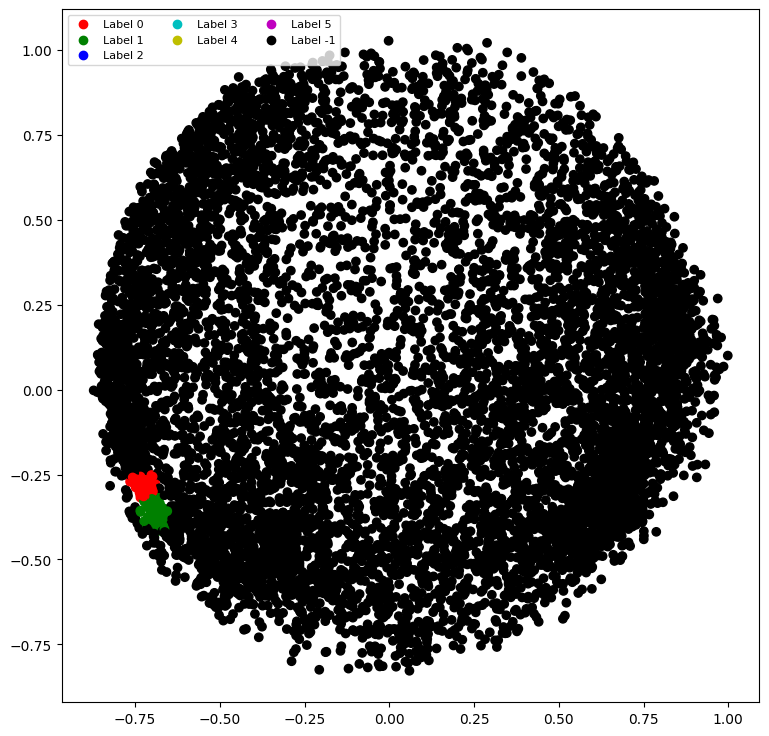

In [11]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()
